In [1]:
%load_ext autoreload
%autoreload 2    

In [2]:
import os
import sys
import numpy as np
import scipy as sp
import pandas as pd
import h5py
import matplotlib.pyplot as plt

In [3]:
sys.path.insert(0, '../')

In [228]:
from lv.base.basegrid import BaseGrid

In [229]:
b = BaseGrid("B")

In [230]:
b.load_grid()

(2204,) (5760, 2204) (5760, 5)


In [231]:
b.prepare()

#220 R=1000.00
Building RBF on flux shape (5760, 220)
[1.9403e+02 1.4640e+01 5.7500e+00 1.8700e+00 9.3000e-01 7.3000e-01
 6.0000e-01 3.4000e-01 2.4000e-01 1.7000e-01]


In [239]:
b.getSky()

In [248]:
b.test = {"pmt": np.array([-2.0, 8000, 2.5, 0.0, 0.25]), "noise_level": 0.1,
            "obsflux": None, "obsvar": None}

In [232]:
fdx = b.get_fdx_from_pmt([-2.0, 8000,2.5,0.0,0.0])

In [242]:
flux0 = b.flux[fdx]

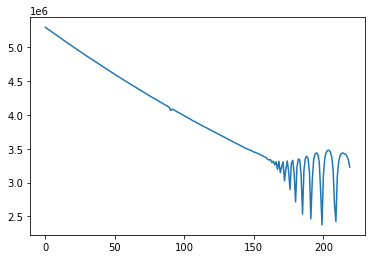

In [243]:
plt.plot(flux0)

In [246]:
obsflux, obsvar = b.Obs.makeFluxObs(flux0, 1)

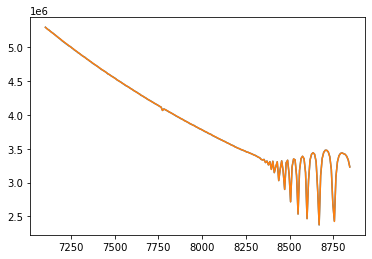

In [247]:
plt.plot(wave, obsflux)
plt.plot(wave, flux0)

In [250]:
x=8000
temp_pmt = [-2.0, 8000, 2.5, 0.0, 0.25]
b.eval_pmt_on_axis(temp_pmt, x, obsflux, obsvar, axis="T")

Fitting with Template T8000G25Mm20Ap03Cp00


AttributeError: 'BaseGrid' object has no attribute 'bnds'

In [193]:
flux0 = b.flux[0]

In [194]:
flux0

array([3206280., 3199090., 3192030., 3184680., 3177900., 3171220.,
       3163160., 3157170., 3150300., 3142880., 3136400., 3129230.,
       3121380., 3115540., 3108740., 3101220., 3094900., 3087470.,
       3081380., 3074480., 3067630., 3060820., 3054050., 3047310.,
       3040450., 3033650., 3026290., 3020200., 3013190., 3006110.,
       2999710., 2992990., 2986600., 2980030., 2973260., 2966430.,
       2959950., 2953360., 2946700., 2939660., 2933140., 2926800.,
       2919540., 2913070., 2906430., 2900590., 2894140., 2886880.,
       2880840., 2873680., 2867980., 2861670., 2855050., 2848690.,
       2841480., 2835800., 2827880., 2822800., 2816430., 2810150.,
       2803890., 2797500., 2790790., 2784750., 2778240., 2772110.,
       2765280., 2759540., 2753230., 2746960., 2740040., 2734410.,
       2728220., 2721950., 2715750., 2709140., 2701900., 2697120.,
       2690890., 2684770., 2678490., 2672030., 2664910., 2659950.,
       2653940., 2648000., 2641790., 2635350., 2629780., 26237